This notebook will serve for various tests of higher dimensional clustering.

First, we will try out the segmentation of good/bad sources based on clustering with the BCT25 current as a forth dimension. The hypothesis is that similar clusters will arise, especially when looking at the unstable source, but probably a lot of data will be attributet to one of the two classes wrongly. This can be explained by the fact that the clustering algorithm only looks at a single point in time while the distinction between stable and unstable source is based on a timewindow.

In [3]:
# %load ../ionsrcopt/load_data.py
import pandas as pd
import numpy as np

def read_data_from_csv(filename, cols_to_read, rows_to_read):
    """ Read a csv file into a DataFrame

    Parameters:
        filename (string): Filename
        cols_to_read (list of string): The column names to read, None if everything should be read
        rows_to_read (list of int): The rown numbers to read, None if everything should be read

    Returns:
        DataFrame
    """

    print("Loading data from csv file \'{}\'".format(filename))
    if cols_to_read is None:
        df = pd.read_csv(filename).fillna(method='ffill')
    else:
        df = pd.read_csv(filename, usecols=cols_to_read).fillna(method='ffill')

    if rows_to_read is None:
        return df
    else:
        return df.iloc[rows_to_read]

def convert_column(df, column, type):
    """ Converts the dtype of a column

    Parameters:
        df (DataFrame): The DataFrame containing the column
        column (string): The column name
        type (string): dtype the column should be converted to

    Returns:
        DataFrame: The altered DataFrame or the old one, if it did not contain the specified column
    """

    if column in df.columns:
        print("Converting column \'{}\' to \'{}\'".format(column, type))
        return df.astype({column:type})
    else:
        print("Column \'{}\' does not exist".format(column))
        return df

def convert_column_types(df):
    """ Convert all columns of a Dataframe of measurements to single precision values.

    Parameters:
        df (DataFrame): DataFrame to be altered

    Returns:
        DataFrame
    """

    print("Started type conversion of columns...")
    if 'Timestamp (UTC_TIME)' in df.columns:
        print("Converting column \'{}\' to \'{}\'".format('Timestamp (UTC_TIME)', 'datetime'))
        df['Timestamp (UTC_TIME)'] = pd.to_datetime(df['Timestamp (UTC_TIME)']) 
    df = convert_column(df, 'IP.NSRCGEN:BIASDISCAQNV', 'float32')
    df = convert_column(df, 'IP.NSRCGEN:GASSASAQN', 'float32')
    df = convert_column(df, 'IP.NSRCGEN:SOURCEHTAQNI', 'float32')
    df = convert_column(df, 'IP.SAIREM2:FORWARDPOWER', 'float32')
    df = convert_column(df, 'IP.SOLCEN.ACQUISITION:CURRENT', 'float32')
    df = convert_column(df, 'IP.SOLEXT.ACQUISITION:CURRENT', 'float32')
    df = convert_column(df, 'IP.SOLINJ.ACQUISITION:CURRENT', 'float32')
    df = convert_column(df, 'ITF.BCT15:CURRENT', 'float32')
    df = convert_column(df, 'ITF.BCT25:CURRENT', 'float32')
    df = convert_column(df, 'ITH.BCT41:CURRENT', 'float32')
    df = convert_column(df, 'ITL.BCT05:CURRENT', 'float32')
    return df


def set_BCT25_current_none(df, condition):
    df['ITF.BCT25:CURRENT'] = np.select([condition], [np.nan], [df['ITF.BCT25:CURRENT']])

def clean_data(df):
    """ Clean the data of measurements, that are outliers, e.g. spikes in the extraction current.

    Parameters:
        df (DataFrame): DataFrame containing the measurements.

    Returns:
        DataFrame: Cleaned data.
    """

    print("Filtering data...")
    #df.dropna(inplace=True)
    if 'ITF.BCT15:CURRENT' in df.columns:
        #df.drop(df[df['ITF.BCT15:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, 'ITF.BCT15:CURRENT', lambda x: x < 0)  
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT15:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'ITF.BCT25:CURRENT' in df.columns:
        #df.drop(df[df['ITF.BCT25:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, df['ITF.BCT25:CURRENT'] < 0)
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT25:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'ITH.BCT41:CURRENT' in df.columns:
        #df.drop(df[df['ITH.BCT41:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, df['ITH.BCT41:CURRENT'] < 0)
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT41:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'ITL.BCT05:CURRENT' in df.columns:
        #df.drop(df[df['ITL.BCT05:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, df['ITL.BCT05:CURRENT'] < 0)
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT05:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'IP.NSRCGEN:OVEN1AQNP' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:OVEN1AQNP'] < 4.5].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:OVEN1AQNP'] < 4.5)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:OVEN1AQNP'].apply(lambda x: np.nan if x < 4.5 else x)
    if 'IP.SOLEXT.ACQUISITION:CURRENT' in df.columns:
        #df.drop(df[df['IP.SOLEXT.ACQUISITION:CURRENT'] < 1200].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.SOLEXT.ACQUISITION:CURRENT'] < 1200)
        df['ITF.BCT25:CURRENT'] = df['IP.SOLEXT.ACQUISITION:CURRENT'].apply(lambda x: np.nan if x < 1200 else x)
    if 'IP.NSRCGEN:BIASDISCAQNV' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:BIASDISCAQNV'] == 0].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:BIASDISCAQNV'] == 0)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:BIASDISCAQNV'].apply(lambda x: np.nan if x == 0 else x)
    if 'IP.SAIREM2:FORWARDPOWER' in df.columns:
        #df.drop(df[df['IP.SAIREM2:FORWARDPOWER'] < 500].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.SAIREM2:FORWARDPOWER'] < 500)
        df['ITF.BCT25:CURRENT'] = df['IP.SAIREM2:FORWARDPOWER'].apply(lambda x: np.nan if x < 500 else x)
    if 'IP.NSRCGEN:SOURCEHTAQNI' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:SOURCEHTAQNI'] > 2.5].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:SOURCEHTAQNI'] > 2.5)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:SOURCEHTAQNI'].apply(lambda x: np.nan if x > 2.5 else x)
    if 'IP.NSRCGEN:SOURCEHTAQNI' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:SOURCEHTAQNI'] < 0.5].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:SOURCEHTAQNI'] < 0.5)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:SOURCEHTAQNI'].apply(lambda x: np.nan if x < 0.5 else x)
    
    return df

In [4]:
# %load ../ionsrcopt/histogram_clustering.py
import pandas as pd
import numpy as np
import itertools
from statsmodels.stats.weightstats import DescrStatsW

def generate_density_histogram(df, columns, bins):
    """ From the supplied data generates a histogram, where the value of each bin indicates how many items lay inside, in percent. I.e summing over the whole histogram yields 1.

    Parameters:
        df (DataFrame)
        columns (list of string): The column name of which the joint histogram should be created
        bins (list): See numpy.histogramdd for more information

    Returns:
        H (multidimensional nparray): The values of every bin
        edges (list of nparray): Edges of the bins in every dimension
    """

    H, edges = np.histogramdd(df[columns].values, bins=bins, density=True)

    normalization_factor = np.prod([abs(edges[i][1] - edges[i][0]) for i in range(len(bins))])
    H = H * normalization_factor
    return H, edges

# Nearest neighbour clustering
def do_BFS_step(p, clusters, current_cluster, bins, histogram_values, threshold):
    """ One step of BFS. A bin in the histogram is considered a node in the underluying graph, if its value is above a certain threshold.

    Parameters:
        p (tuple of int): Histogram coordinates of the currently expanded node
        clusters (nparray): For each bin, indicating which cluster it belongs to. -1 if none. Gets altered if the bin at p is found to be in a cluster. Same dimension as histogram.
        current_cluster (int): index of the currently searched cluster
        bins (list)
        histogram_values (nparray): Histogram values
        threshold (double): Every bin below this threshold will be discarded as noise

    Returns
        list of tuple of int: All children of p, but not necessarily nodes in the underlying graph.
    """

    result = []
    if clusters[p] >= 0 or histogram_values[p] < threshold: # Node has to be ignored. Else assign to cluster and find children.
        return result
    
    clusters[p] = current_cluster
    for i in range(len(p)):
        if p[i] > 0:
            child = list(p)
            child[i] -= 1
            result.append(tuple(child))
        if p[i] + 1 < bins[i]:
            child = list(p)
            child[i] += 1
            result.append(tuple(child))
    return result

def nearest_neighbour_clustering(histogram_values, bins, density_threshold):
    """ Searches for clusters in the given histogram, where all bins with a density below the threshold are discarded as noise. For clustering BFS is used, i.e. clusters are connected components of the underlying graph.

    Parameters:
        histogram_values (nparray): The values of every bin.
        bins (list)
        density_threshold (double): Every bin below this threshold will be discarded as noise

    Returns:
        int: Number of clusters found
        nparray of int: For every bin in the histogram, returns which cluster it belongs to, or -1 if none.
    """

    clusters = np.ones(bins)
    clusters *= -1
    current_cluster = 0

    l = [range(b) for b in bins]
    perms = list(itertools.product(*l))
    for p in perms:
        if clusters[p] >= 0 or histogram_values[p] < density_threshold:
            continue
        
        print("Started search for cluster {}".format(current_cluster))
        nodes_to_check = do_BFS_step(p, clusters, current_cluster, bins, histogram_values, density_threshold)
        while len(nodes_to_check) > 0:
            node = nodes_to_check.pop(0)
            nodes_to_check.extend(do_BFS_step(tuple(node), clusters, current_cluster, bins, histogram_values, density_threshold))
        
        current_cluster += 1

    print("Found {} cluster(s)".format(current_cluster))
    return current_cluster, clusters

def create_cluster_frame(histogram_edges, histogram_values, bins, clusters, columns, cluster_column_name='CLUSTER'): 
    """ Constructs a Data Frame from a histogram and cluster results

    Parameters:
        histogram_edges (list of nparray): Edges of the bins in every dimension
        histogram_values (nparray): The values of every bin.
        bins (list)
        clusters (list of int): cluster, to which every bin belongs to
        columns (list of string): column names of clustered data
        cluster_column_name (string): column name of the cluster result

    Returns:
        DataFrame: A frame that contains density and cluster information about every bin
    """
    
    l = [range(b) for b in bins]
    perms = list(itertools.product(*l))
    values = [[(histogram_edges[i][perm[i]] + histogram_edges[i][perm[i]+1])*0.5 for i in range(len(bins))] + [histogram_values[perm], clusters[perm]] for perm in perms]
    clustered = pd.DataFrame(values, columns=columns + ['DENSITY', cluster_column_name])
    return clustered


def describe_cluster(cluster, columns):
    """ Generate descriptive statistics for a cluster

    Parameters:
        cluster (DataFrame): A dataframe, that contains density informations for every bin in the cluster
        columns (list of string): The names of the columns for which to generate statistics

    Returns: 
        Series: All statistics for the selected columns
    """

    values = cluster.values
    dstats = DescrStatsW(values, cluster['DENSITY'].values if len(values) > 1 else None)
    mean = dstats.mean
    std = dstats.std
    quantiles = dstats.quantile(0.5, return_pandas=False)
    
    result_columns = [[mean[i], std[i], std[i] / abs(mean[i]) * 100, cluster[columns[i]].min(), quantiles[0][i], cluster[columns[i]].max()] for i in range(len(columns))]
    result = list(itertools.chain(*result_columns)) + [cluster['DENSITY'].count(), cluster['DENSITY'].sum() * 100]
    
    value_columns = [[(col, 'mean'), (col, 'std'), (col, 'varC (%)'), (col, 'min'), (col, 'median'), (col, 'max')] for col in columns]
    index = list(itertools.chain(*value_columns)) + [('DENSITY', 'count'), ('DENSITY', 'total')]
    
    return pd.Series(result, index=pd.MultiIndex.from_tuples(index))


def describe_clusters(df, columns):
    """ Summarize all clusters and sort them by density

    Parameters:
        df (DataFrame): A frame containing density and cluster information about every bin
        columns (list of string): The names of the columns for which to generate statistics
    
    Returns:
        DataFrame: Descriptive frame sorted by density
    """

    result = df.groupby('CLUSTER').apply(describe_cluster, columns)
    return result.sort_values(('DENSITY', 'total'), ascending=0)

In [33]:
df = read_data_from_csv('../Data_Raw/Nov2018.csv', None, None)
df = convert_column_types(df)
df.dropna(inplace=True)
df.shape

Loading data from csv file '../Data_Raw/Nov2018.csv'
Started type conversion of columns...
Converting column 'Timestamp (UTC_TIME)' to 'datetime'
Converting column 'IP.NSRCGEN:BIASDISCAQNV' to 'float32'
Converting column 'IP.NSRCGEN:GASSASAQN' to 'float32'
Converting column 'IP.NSRCGEN:SOURCEHTAQNI' to 'float32'
Converting column 'IP.SAIREM2:FORWARDPOWER' to 'float32'
Converting column 'IP.SOLCEN.ACQUISITION:CURRENT' to 'float32'
Converting column 'IP.SOLEXT.ACQUISITION:CURRENT' to 'float32'
Converting column 'IP.SOLINJ.ACQUISITION:CURRENT' to 'float32'
Converting column 'ITF.BCT15:CURRENT' to 'float32'
Converting column 'ITF.BCT25:CURRENT' to 'float32'
Converting column 'ITH.BCT41:CURRENT' to 'float32'
Converting column 'ITL.BCT05:CURRENT' to 'float32'


(2866351, 13)

In [34]:
cols_to_cluster = ['IP.NSRCGEN:BIASDISCAQNV', 'IP.NSRCGEN:GASSASAQN', 'IP.SOLCEN.ACQUISITION:CURRENT', 'IP.NSRCGEN:SOURCEHTAQNI']

In [35]:
bins = [50, 50, 100, 50]
H, edges = generate_density_histogram(df, cols_to_cluster, bins)

In [36]:
hist_mean = np.mean(H)
hist_std = np.std(H)
threshold = hist_mean+hist_std
threshold

4.259313585637012e-05

In [37]:
num_clusters, clusters = nearest_neighbour_clustering(H, bins, threshold)
cl_df = create_cluster_frame(edges, H, bins, clusters, cols_to_cluster)
described = describe_clusters(cl_df, cols_to_cluster).round(3)

Started search for cluster 0
Started search for cluster 1
Started search for cluster 2
Started search for cluster 3
Started search for cluster 4
Started search for cluster 5
Started search for cluster 6
Started search for cluster 7
Started search for cluster 8
Started search for cluster 9
Started search for cluster 10
Started search for cluster 11
Started search for cluster 12
Started search for cluster 13
Started search for cluster 14
Started search for cluster 15
Started search for cluster 16
Started search for cluster 17
Started search for cluster 18
Started search for cluster 19
Started search for cluster 20
Started search for cluster 21
Started search for cluster 22
Started search for cluster 23
Started search for cluster 24
Started search for cluster 25
Started search for cluster 26
Started search for cluster 27
Started search for cluster 28
Started search for cluster 29
Started search for cluster 30
Started search for cluster 31
Started search for cluster 32
Started search for c

In [38]:
pd.set_option('display.max_columns', 500)
described.drop(('DENSITY', 'count'), axis=1).head(n=10)

IP.NSRCGEN:BIASDISCAQNV                                        \
                           mean     std varC (%)    min median    max   
CLUSTER                                                                 
25.0                   -234.467   0.854    0.364 -241.5 -234.5 -227.5   
3.0                    -260.804   8.300    3.182 -276.5 -255.5 -248.5   
11.0                   -254.818   2.102    0.825 -262.5 -255.5 -248.5   
22.0                   -238.204   3.494    1.467 -241.5 -241.5 -234.5   
29.0                   -227.320  10.490    4.615 -234.5 -234.5 -199.5   
33.0                   -223.706   4.432    1.981 -227.5 -227.5 -199.5   
6.0                    -276.500   0.000    0.000 -276.5 -276.5 -276.5   
5.0                    -268.166   5.687    2.121 -276.5 -269.5 -255.5   
0.0                    -301.749  16.734    5.546 -339.5 -290.5 -269.5   
1.0                    -294.071   3.499    1.190 -297.5 -297.5 -290.5   

        IP.NSRCGEN:GASSASAQN                                       \
                        mean    std varC (%)    min median    max   
CLUSTER                                                             
25.0                   5.207  0.000     0.00  5.207  5.207  5.207   
3.0                    5.202  0.053     1.02  5.044  5.207  5.369   
11.0                   5.207  0.000     0.00  5.207  5.207  5.207   
22.0                   5.207  0.000     0.00  5.207  5.207  5.207   
29.0                   5.207  0.000     0.00  5.207  5.207  5.207   
33.0                   5.207  0.000     0.00  5.207  5.207  5.207   
6.0                    5.207  0.000     0.00  5.207  5.207  5.207   
5.0                    5.207  0.000     0.00  5.207  5.207  5.207   
0.0                    5.207  0.000     0.00  5.207  5.207  5.207   
1.0                    5.207  0.000     0.00  5.207  5.207  5.207   

        IP.SOLCEN.ACQUISITION:CURRENT                                    \
                                 mean    std varC (%)      min   median   
CLUSTER                                                                   
25.0                          289.816  0.000    0.000  289.816  289.816   
3.0                           219.811  0.000    0.000  219.811  219.811   
11.0                          239.412  0.000    0.000  239.412  239.412   
22.0                          219.811  0.000    0.000  219.811  219.811   
29.0                          225.414  0.097    0.043  225.411  225.411   
33.0                          239.412  0.000    0.000  239.412  239.412   
6.0                           239.412  0.000    0.000  239.412  239.412   
5.0                           225.411  0.000    0.000  225.411  225.411   
0.0                           231.011  0.000    0.000  231.011  231.011   
1.0                           239.412  0.000    0.000  239.412  239.412   

                 IP.NSRCGEN:SOURCEHTAQNI                                       \
             max                    mean    std varC (%)    min median    max   
CLUSTER                                                                         
25.0     289.816                   1.650  0.090    5.484  1.207  1.612  1.882   
3.0      219.811                   1.534  0.104    6.766  1.342  1.477  2.017   
11.0     239.412                   1.530  0.031    2.030  1.477  1.544  1.814   
22.0     219.811                   1.577  0.131    8.280  1.139  1.544  1.882   
29.0     228.211                   1.596  0.074    4.629  1.409  1.612  1.747   
33.0     239.412                   1.680  0.183   10.873  1.409  1.679  2.084   
6.0      239.412                   1.567  0.083    5.310  1.477  1.544  1.882   
5.0      225.411                   1.592  0.034    2.130  1.544  1.612  1.747   
0.0      231.011                   1.814  0.050    2.764  1.679  1.814  2.017   
1.0      239.412                   1.834  0.033    1.785  1.747  1.814  1.949   

        DENSITY  
          total  
CLUSTER          
25.0     18.022  
3.0      16.934  
11.0     11.260  
22.0      9.403  
29.0

In [39]:
def binary_search_edge(edges, value):
    l=0
    r=len(edges)-1
    if value < edges[l] or value > edges[r]:
        return -1

    while r-l > 1:
        m = int((l+r)*0.5)
        if value == edges[m]:
            return m
        elif value < edges[m]:
            r = m
        else:
            l = m

    return l

def find_corresponding_cluster(x, clusters, edges, num_cols):
    indices = tuple([binary_search_edge(edges[i], x[i]) for i in range(num_cols)])
    return clusters[indices]

df_sample = df[df['IP.NSRCGEN:GASSASAQN'] < 6].sample(10000)
df_sample['CLUSTER'] = [find_corresponding_cluster(x, clusters, edges, len(cols_to_cluster)) for x in df_sample[cols_to_cluster].values]

<IPython.core.display.Javascript object>


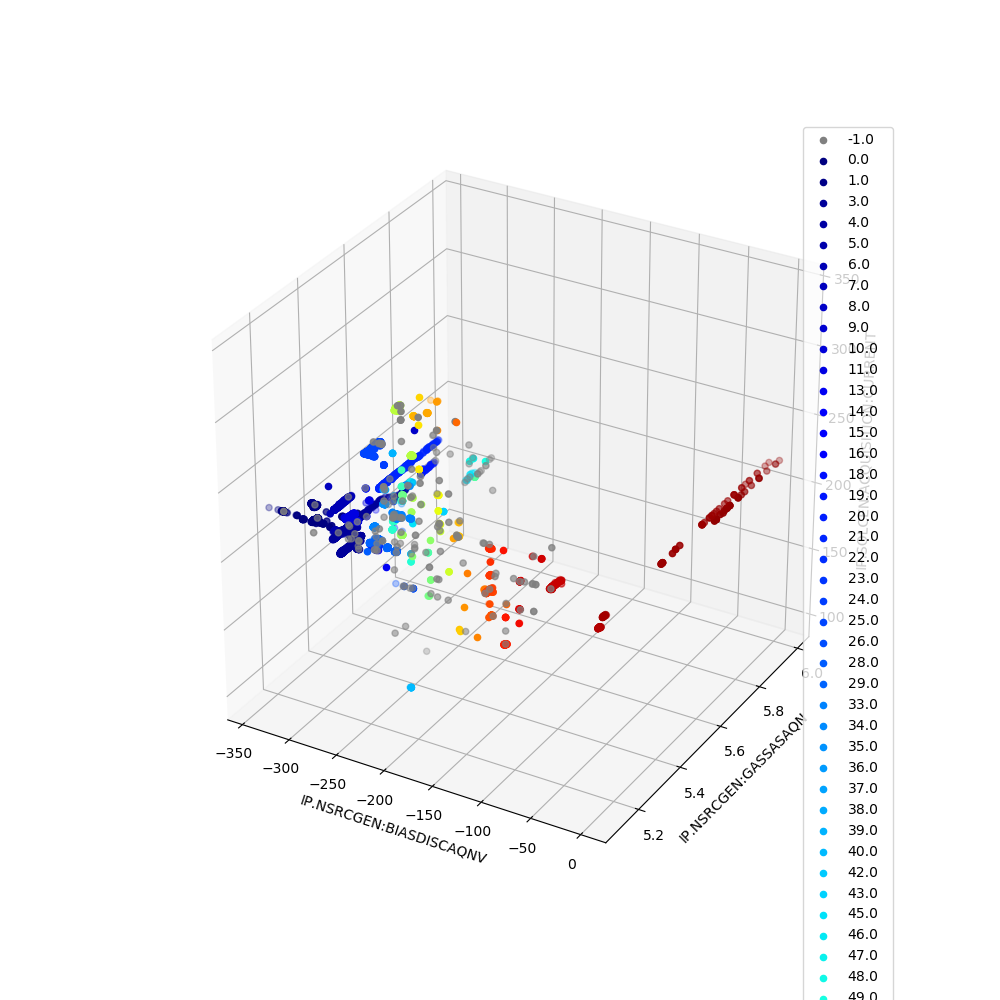

In [40]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('jet', num_clusters)
cmap.set_under('gray')
cmap.set_over('gray')

norm = mpl.colors.Normalize(vmin=0, vmax=num_clusters)
scalarMap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for (name, group) in df_sample.groupby('CLUSTER'):
    cax = ax.scatter(group[cols_to_cluster[0]], group[cols_to_cluster[1]], group[cols_to_cluster[2]], marker='o', c=[scalarMap.to_rgba(name)], label=name)

plt.legend() 
    
ax.set_xlabel(cols_to_cluster[0])
ax.set_ylabel(cols_to_cluster[1])
ax.set_zlabel(cols_to_cluster[2])

plt.show()

In [41]:
num_of_top_clusters = 5
top_clusters = list(described.head(n=num_of_top_clusters).index)
top_clusters.sort()
df_sample.loc[df_sample['CLUSTER'].isin(top_clusters) == False, 'CLUSTER'] = -1

<IPython.core.display.Javascript object>


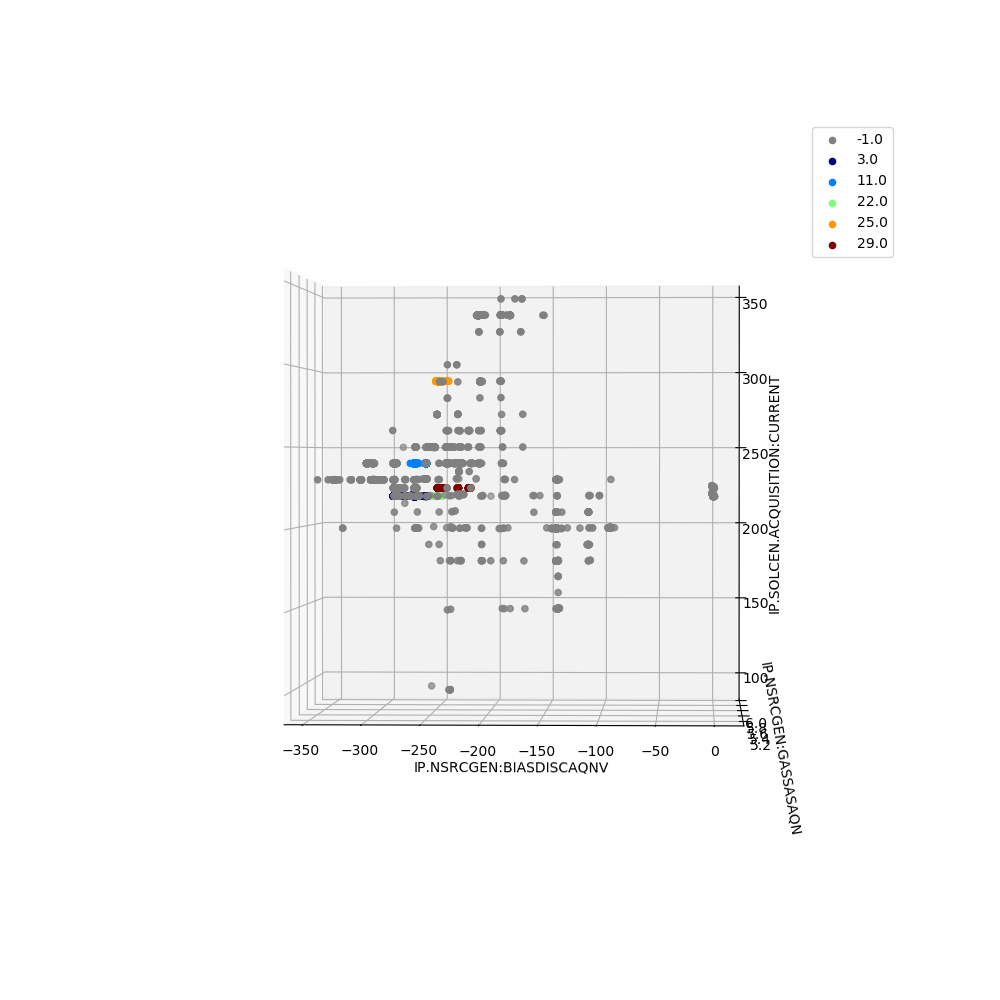

In [42]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('jet', num_of_top_clusters)
cmap.set_under('gray')
cmap.set_over('gray')

norm = mpl.colors.Normalize(vmin=0, vmax=num_of_top_clusters)
scalarMap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for (name, group) in df_sample.groupby('CLUSTER'):
    lookup = top_clusters.index(name) if name in top_clusters else -1
    cax = ax.scatter(group[cols_to_cluster[0]], group[cols_to_cluster[1]], group[cols_to_cluster[2]], marker='o', c=[scalarMap.to_rgba(lookup)], label=name)

plt.legend() 
    
ax.set_xlabel(cols_to_cluster[0])
ax.set_ylabel(cols_to_cluster[1])
ax.set_zlabel(cols_to_cluster[2])

plt.show()

In [32]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,IP.NSRCGEN:BIASDISCAQNV,IP.NSRCGEN:GASSASAQN,IP.SAIREM2:FORWARDPOWER,IP.SOLCEN.ACQUISITION:CURRENT,ITF.BCT25:CURRENT
IP.NSRCGEN:BIASDISCAQNV,1,0.4,-0.39,-0.061,-0.46
IP.NSRCGEN:GASSASAQN,0.4,1,-0.22,-0.079,-0.27
IP.SAIREM2:FORWARDPOWER,-0.39,-0.22,1,-0.67,-0.011
IP.SOLCEN.ACQUISITION:CURRENT,-0.061,-0.079,-0.67,1,0.24
ITF.BCT25:CURRENT,-0.46,-0.27,-0.011,0.24,1
